<a href="https://colab.research.google.com/github/yperdana/Simple-Linear-Regression-Dummy-Data/blob/master/Simple_Linear_Regression_With_Dummy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@description 
# this project is part of Bangkit Academy training module for a team.
# we learn Simple linear Regression for our first project
# the team members are: Yohanes, Eko, and Yogic

# source of the basic code: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises

Learning Objectives:
1. Generate Model
2. Separate Training and Test Data
3. Visualize Graph

In [0]:
# Select Import TensorFlow 2.x and anothere Library
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

There are 3 imported library in this project such as:
1. Tensorflow, is powerfull library for machine learning. We use Tensorflow 2 because the newest version.
2. Pandas, a library to represent datasets in memory.
3. Matplotlib, is a plotting library and its numerical mathematics extension Numpy.





In [13]:
# Define a model. Model is created and will trained using dummy data.
# THE FIRST METHOD IS USED TO SETTING UP THE MODEL
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential represents a linear grouping of layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  # IN THIS CASE WE JUST NEED ONE LAYER THEN WE PUT 1 UNIT DENSE LAYER
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error.
  # IN THIS CASE WE USE LEARNING RATE, LOSS, AND ROOT MEAN SQUARE ERROR. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           

def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


We had created 2 methods, the first method build_model is to generate and setup the model. the second method is used to set up and train the model.

In [14]:
#Generate plotting functions
# TO SET UP AND GENERATE THE GRAPH
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  # THIS BOTH CODE IS TO SET THE LABEL NAME
  plt.xlabel("feature")
  plt.ylabel("label")

  # THIS CODE IS USED TO SET THE DATA POSITIONS
  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  # TO SET THE FIRST POINT AND THE END POINT OF THE LINE
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  # TO SHOW THE GRAPH OR LINE
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  # THIS CODE IS TO SET THE LABEL NAME
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  # TO SET AND SHOW THE GRAPH
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Code above used to set and show 2 kind og graph. the 1st graph used to show the training model result and the data. The second method used to show the loss curve.

In [0]:
# Define the dataset
my_feature = ([1.0, 2.0,  2.3, 4.0, 5.0, 6.0, 7.0, 8.0, 8.0, 8.0, 9.0, 10.0])
my_label   = ([2.0, 2.2,  1.9, 2.2, 2.8, 2.5, 3.4, 2.8, 2.9, 3.0, 2.8, 3.2])

This is the Dummy data. we have modified the data from the original source.

Train on 12 samples
Epoch 1/190
12/12 [==============================] - 0s 19ms/sample - loss: 39.1773 - root_mean_squared_error: 6.2592
Epoch 2/190
12/12 [==============================] - 0s 601us/sample - loss: 33.6020 - root_mean_squared_error: 5.7967
Epoch 3/190
12/12 [==============================] - 0s 602us/sample - loss: 29.9735 - root_mean_squared_error: 5.4748
Epoch 4/190
12/12 [==============================] - 0s 707us/sample - loss: 27.1701 - root_mean_squared_error: 5.2125
Epoch 5/190
12/12 [==============================] - 0s 689us/sample - loss: 24.8477 - root_mean_squared_error: 4.9847
Epoch 6/190
12/12 [==============================] - 0s 567us/sample - loss: 22.8494 - root_mean_squared_error: 4.7801
Epoch 7/190
12/12 [==============================] - 0s 600us/sample - loss: 21.0889 - root_mean_squared_error: 4.5923
Epoch 8/190
12/12 [==============================] - 0s 625us/sample - loss: 19.5126 - root_mean_squared_error: 4.4173
Epoch 9/190
12/12 [==========

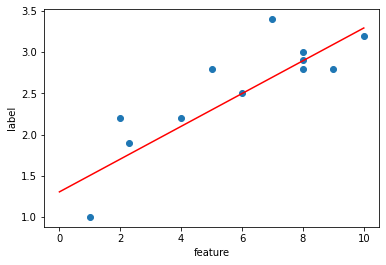

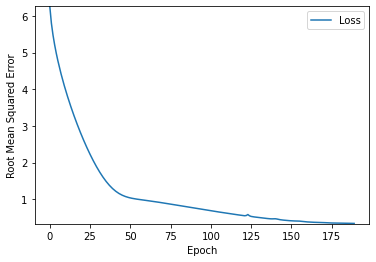

In [25]:
# tunning hyperparameters

learning_rate=0.02
epochs=190
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Conclusion:

1. From the graph above, the data is quite complex. but the generated model was working good. The line model outcome trying to make closer with the data.
2. Re Loss and Root Mean Squared almost 0. but its not perfectly zero, it depends on the data.